In [19]:
library(class)
library(caret)
library(pROC)

In [28]:
data(iris)

index = createDataPartition(iris$Species, p = 0.8, list = FALSE)
train_data = iris[index, ]
test_data = iris[-index, ]

x_train = train_data[, -5]
y_train = train_data$Species
x_test = test_data[, -5]
y_test = test_data$Species

k = 1
pred_knn = knn(train = x_train, test = x_test, cl = y_train, k = k)

accuracy = mean(pred_knn == y_test)

accuracy

[1] 1

In [29]:
conf_matrix = confusionMatrix(pred_knn, y_test)
conf_matrix

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         0
  virginica       0          0        10

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8843, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : 4.857e-15  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            

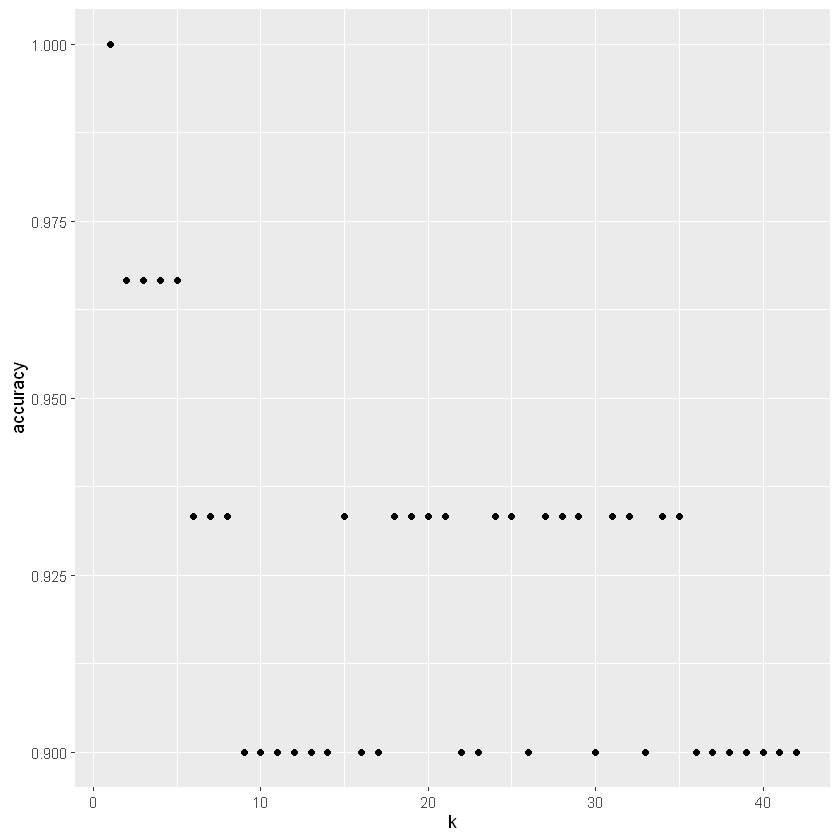

In [43]:
acc_results = data.frame(k = integer(), accuracy = numeric())
for (k in 1:42){
    pred = knn(train = x_train, test = x_test, cl = y_train, k = k)
    acc = mean(pred == y_test)
    acc_results = rbind(acc_results, data.frame(k = k, accuracy = acc))
}

ggplot(acc_results, aes(x = k, y = accuracy)) + geom_point()